In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive 
import os
import seaborn as sns 
!pip install geopandas
!pip install pygeos
import numpy as np

drive.mount('/content/drive')

     |████████████████████████████████| 972kB 2.6MB/s 
     |████████████████████████████████| 10.9MB 43.2MB/s 
     |████████████████████████████████| 14.8MB 318kB/s 
     |████████████████████████████████| 1.6MB 2.7MB/s 
Mounted at /content/drive


You'll need to make a shortcut of the Datathon Materials folder to your drive 


In [2]:
path='/content/drive/My Drive/Datathon Materials' #might need to change that depending on what you have 
counties_path=[] 
census_path=[]
for file in os.scandir(path) :
  if file.name.endswith('.zip'):
    !unzip "$file.path" 
  elif 'Counties' in file .name:
    counties_path+=[file.path]
  elif file.name.endswith('.csv'):
    census_path+=[file.path]

call_311_path=[]
for i in os.scandir('/content/'): 
  if i.name.endswith('.csv'):
    call_311_path+=[i.path]


Archive:  /content/drive/My Drive/Datathon Materials/311Calls_2018.zip
  inflating: 2018.csv                
Archive:  /content/drive/My Drive/Datathon Materials/311Calls_2017.zip
  inflating: 2017.csv                
Archive:  /content/drive/My Drive/Datathon Materials/311Calls_2016.zip
  inflating: 2016.csv                
Archive:  /content/drive/My Drive/Datathon Materials/311Calls_2015.zip
  inflating: 2015.csv                
Archive:  /content/drive/My Drive/Datathon Materials/311Calls_2014.zip
  inflating: 2014.csv                
Archive:  /content/drive/My Drive/Datathon Materials/311Calls_2013.zip
  inflating: 2013.csv                
Archive:  /content/drive/My Drive/Datathon Materials/311Calls_2010.zip
  inflating: 2010.csv                
Archive:  /content/drive/My Drive/Datathon Materials/311Calls_2012.zip
  inflating: 2012.csv                
Archive:  /content/drive/My Drive/Datathon Materials/311Calls_2011.zip
  inflating: 2011.csv                


In [3]:
Y=0
#call_311=pd.read_csv(call_311_path[Y],index_col=0)

column_names={'B01001_001E':'Population','B19013_001E':'mid_Income','B25077_001E':'mid_Home_price','B03002_003E':'Nbr_Caucasians',
 'B03002_004E':'Nbr_Af_Americans','B02001_004E':'Nbr_Ind_Alaskans','B03002_006E':'Nbr_Asians','B03002_007E':'Nbr_Hawaiian_Pac_Islands',
 'B03002_008E':'Nbr_others','B03002_009E':'Nbr_mult_race','B03002_012E':'Nbr_Latinos'}


Income_groups={'B19013A_001E':'Income White','B19013B_001E':'Income Af_Americans','B19013C_001E':'Income Ind_Alaskans','B19013D_001E':'Income ASIANS','B19013E_001E':'Income Hawaiian_Pac_Islands',
               'B19013F_001E':'Income other','B19013G_001E':'Income mult_race','B19013I_001E':'Income Latino'}

In [4]:
Y=0
census=pd.read_csv(census_path[Y])
census.rename(columns=column_names,inplace=True)
census=census.set_index('geoid').drop(columns=census.columns[0])

In [5]:
!pip install census
#pip insrall us

import pandas as pd
from census import Census


YOUR_API_KEY ='c5d98603e43a6437714b80d3cb0d3c9f0e2c8e93'
CENSUS_FILE_NAME = 'mycensus'
variables = ['NAME', 'B15002_015E',  'B15002_032E','B19013A_001E', 'B19013B_001E', 'B19013C_001E', 'B19013D_001E', 'B19013E_001E', 'B19013F_001E', 'B19013G_001E', 'B19013I_001E']

years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018] 


c = Census(YOUR_API_KEY)


nyc_met_area = [
    {"state_code":"34", "county_code": "003", "county_name": "Bergen, NJ"},
    {"state_code":"34", "county_code": "013", "county_name": "Essex, NJ"},
    {"state_code":"34", "county_code": "017", "county_name": "Hudson, NJ"},
    {"state_code":"34", "county_code": "019", "county_name": "Hunterdon, NJ"},
    {"state_code":"34", "county_code": "023", "county_name": "Middlesex, NJ"},
    {"state_code":"34", "county_code": "025", "county_name": "Monmouth, NJ"},
    {"state_code":"34", "county_code": "027", "county_name": "Morris, NJ"},
    {"state_code":"34", "county_code": "029", "county_name": "Ocean, NJ"},
    {"state_code":"34", "county_code": "031", "county_name": "Passaic, NJ"},
    {"state_code":"34", "county_code": "035", "county_name": "Somerset, NJ"},
    {"state_code":"34", "county_code": "037", "county_name": "Sussex, NJ"},
    {"state_code":"34", "county_code": "039", "county_name": "Union, NJ"},
    {"state_code":"36", "county_code": "005", "county_name": "Bronx, NY"},
    {"state_code":"36", "county_code": "027", "county_name": "Dutchess, NY"},
    {"state_code":"36", "county_code": "047", "county_name": "Kings, NY"},
    {"state_code":"36", "county_code": "059", "county_name": "Nassau, NY"},
    {"state_code":"36", "county_code": "061", "county_name": "New York, NY"},
    {"state_code":"36", "county_code": "071", "county_name": "Orange, NY"},
    {"state_code":"36", "county_code": "079", "county_name": "Putnam, NY"},
    {"state_code":"36", "county_code": "081", "county_name": "Queens, NY"},
    {"state_code":"36", "county_code": "085", "county_name": "Richmond, NY"},
    {"state_code":"36", "county_code": "087", "county_name": "Rockland, NY"},
    {"state_code":"36", "county_code": "103", "county_name": "Suffolk, NY"},
    {"state_code":"36", "county_code": "119", "county_name": "Westchester, NY"},
    {"state_code":"42", "county_code": "103", "county_name": "Pike, PA"}  
]

dfCounties = pd.DataFrame(nyc_met_area)



def get_acs_data(c, variables, state_code, county_code, year):
    results = c.acs5.state_county_tract(
        variables,
        state_code,
        county_code, 
        Census.ALL,
        year = year
    )
    return results
    
extra_dfs=[]
   
for year in years:
    print('Year: {}'.format(year))

    census_data = []
    for county in nyc_met_area:
        print('      ' + county["county_name"])
        census_data +=  get_acs_data(c,
                                    variables,
                                    county["state_code"], 
                                    county["county_code"],
                                    year)
    
    df = pd.DataFrame(census_data)
    
    #create geoid columns
    df['geoid'] = df['state'] + df['county'] + df['tract']
    df['year'] = year
    
    #move it to the begining of the dataframe
    col = df.pop("year")
    df.insert(0, col.name, col)

    col = df.pop("geoid")
    df.insert(0, col.name, col)
    extra_dfs+=[df]
    #df.to_csv('{}_{}.csv'.format(CENSUS_FILE_NAME, str(year)), index = False)

Year: 2009
      Bergen, NJ
      Essex, NJ
      Hudson, NJ
      Hunterdon, NJ
      Middlesex, NJ
      Monmouth, NJ
      Morris, NJ
      Ocean, NJ
      Passaic, NJ
      Somerset, NJ
      Sussex, NJ
      Union, NJ
      Bronx, NY
      Dutchess, NY
      Kings, NY
      Nassau, NY
      New York, NY
      Orange, NY
      Putnam, NY
      Queens, NY
      Richmond, NY
      Rockland, NY
      Suffolk, NY
      Westchester, NY
      Pike, PA
Year: 2010
      Bergen, NJ
      Essex, NJ
      Hudson, NJ
      Hunterdon, NJ
      Middlesex, NJ
      Monmouth, NJ
      Morris, NJ
      Ocean, NJ
      Passaic, NJ
      Somerset, NJ
      Sussex, NJ
      Union, NJ
      Bronx, NY
      Dutchess, NY
      Kings, NY
      Nassau, NY
      New York, NY
      Orange, NY
      Putnam, NY
      Queens, NY
      Richmond, NY
      Rockland, NY
      Suffolk, NY
      Westchester, NY
      Pike, PA
Year: 2011
      Bergen, NJ
      Essex, NJ
      Hudson, NJ
      Hunterdon, NJ
      Middl

In [6]:
# Qinmeng added a comment below:
# US_CPI (%) are USA Consumer Price Index Data: base year 1982 base of 100
US_CPI=pd.DataFrame([214.537,218.056,224.939,229.594,232.957,236.736,237.017,240.007,245.12,251.107,255.657],index=years+[2019],columns=['inflation'])

In [7]:
all_data=[]
for Y in range(len(years)):
  census=pd.read_csv(census_path[Y])
  census.rename(columns=column_names,inplace=True)
  census=census.set_index('geoid').drop(columns=census.columns[0])
  #We add a gentrified indicator initilized at 0 = No
  census['gentrified']=0
  #We add Education Data
  extra_data=extra_dfs[Y].set_index('geoid')
  extra_data.index=extra_data.index.astype(int)
  extra_data.rename(columns=Income_groups,inplace=True)
  Education=extra_data['B15002_015E']+extra_data['B15002_032E']
  Education.name='Education'
  census=pd.concat((census,Education),axis=1).replace(-666666666.0,0)
  #filtering outliers
  census=census[census.select_dtypes(include=[np.number]).ge(0).all(1)]

  extra_data=extra_data.loc[census.index,'Income White':'Income Latino']
  ethnic_incomes=extra_data.fillna(0).replace(-666666666.0,0)#.pd.DataFrame(.values*np.sign(census.loc[:,'Nbr_Caucasians':'Nbr_Latinos']).values,index=extra_data.index,columns=extra_data.columns)
  census=pd.concat((census,ethnic_incomes),axis=1)
  
  
  #census['Education']/=census['Population']
  census['mid_Home_price']/=US_CPI.loc[years[Y]].values
  
  if Y==0:
    eligible_tracts=census.loc[(census['mid_Home_price']<census['mid_Home_price'].quantile(0.4))
    &(census['Population']>500) &(census['mid_Income']<census['mid_Income'].quantile(0.4))].index
    #we initialize the Home prices that we'll check if it increased when adjusted for inflation
    init_H_prices=census['mid_Home_price']
    init_Education=census['Education']

  if Y>4: # We start checking for gentrification from the 5 year mark
    #Gentrified Test
    mid_increase=(census['mid_Home_price']-init_H_prices)/init_H_prices
    Education_increase=(census['Education']-init_Education)/init_Education
    Gent=(mid_increase>mid_increase.quantile(2/3))&(Education_increase>Education_increase.quantile(2/3))&\
        (census['Population']>500)&(mid_increase>0)
    Gent*=1 #Tranform result to int 
    tracts_to_test=census.index.intersection(eligible_tracts)
    census.loc[tracts_to_test,'gentrified']=Gent
    #Areas already gentrified are considered to stay as such : 
    already_gentrified=all_data[-1].loc[all_data[-1]['gentrified']==1].index
    census.loc[already_gentrified.intersection(census.index),'gentrified']=1
  new_tracts=census.index.difference(init_H_prices.index)
  #check if new tracts are eligible for gentrification 
  eligible_tracts=eligible_tracts.union(census.loc[(census['mid_Home_price']<census['mid_Home_price'].quantile(0.4))
    &(census['Population']>500) &(census['mid_Income']<census['mid_Income'].quantile(0.4))].index)
  #eligible_tracts=.intersection(new_tracts)
  #if there are new tracts, we take the first instance of the home prices
  init_H_prices.append(census['mid_Home_price'].loc[new_tracts])
  init_Education.append(census['Education'].loc[new_tracts])
  all_data+=[census]#.loc[census.index.intersection(eligible_tracts)]
all_data=pd.concat(all_data,keys=years,names=['year','geoid'])
all_data.drop(columns=['year'],inplace=True)

In [8]:
counties=pd.read_csv(counties_path[0])
#We'll only focus on eligible tracts in our analysis
all_data=all_data.loc(axis=0)[:,eligible_tracts].replace(-666666666.0,0)

In [9]:
def outlier_detect(x):
  Q1 = x.quantile(0.25)
  Q3 = x.quantile(0.75)
  IQR = Q3 - Q1    #IQR is interquartile range. 
  filter = (x >= Q1 - 1.5 * IQR) & (x <= Q3 + 1.5 *IQR)
  return filter
  filters=all_data.select_dtypes(include=[np.number]).loc(axis=0)[2011,:].apply(outlier_detect,axis=1)

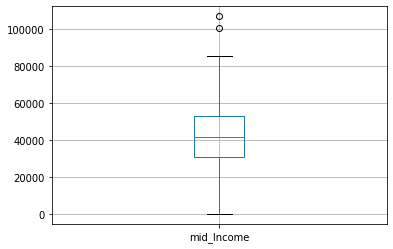

In [10]:
all_data.loc(axis=0)[2011,:][['mid_Income']].boxplot()

# Proper data handling to avoid bias 



In [11]:
from sklearn.model_selection import train_test_split
# we keep 20% of the data for testing later 
train_data, test_data = train_test_split(all_data.loc[2018], stratify=all_data.loc[2018,'gentrified'], test_size=0.2, random_state=42)
gentrified_tracts=train_data.loc[train_data['gentrified']==1].index
eligible_train=eligible_tracts.intersection(train_data.index)
not_gentrified_tracts=train_data.loc[train_data['gentrified']!=1].index.intersection(eligible_train)

## Impact of demographies

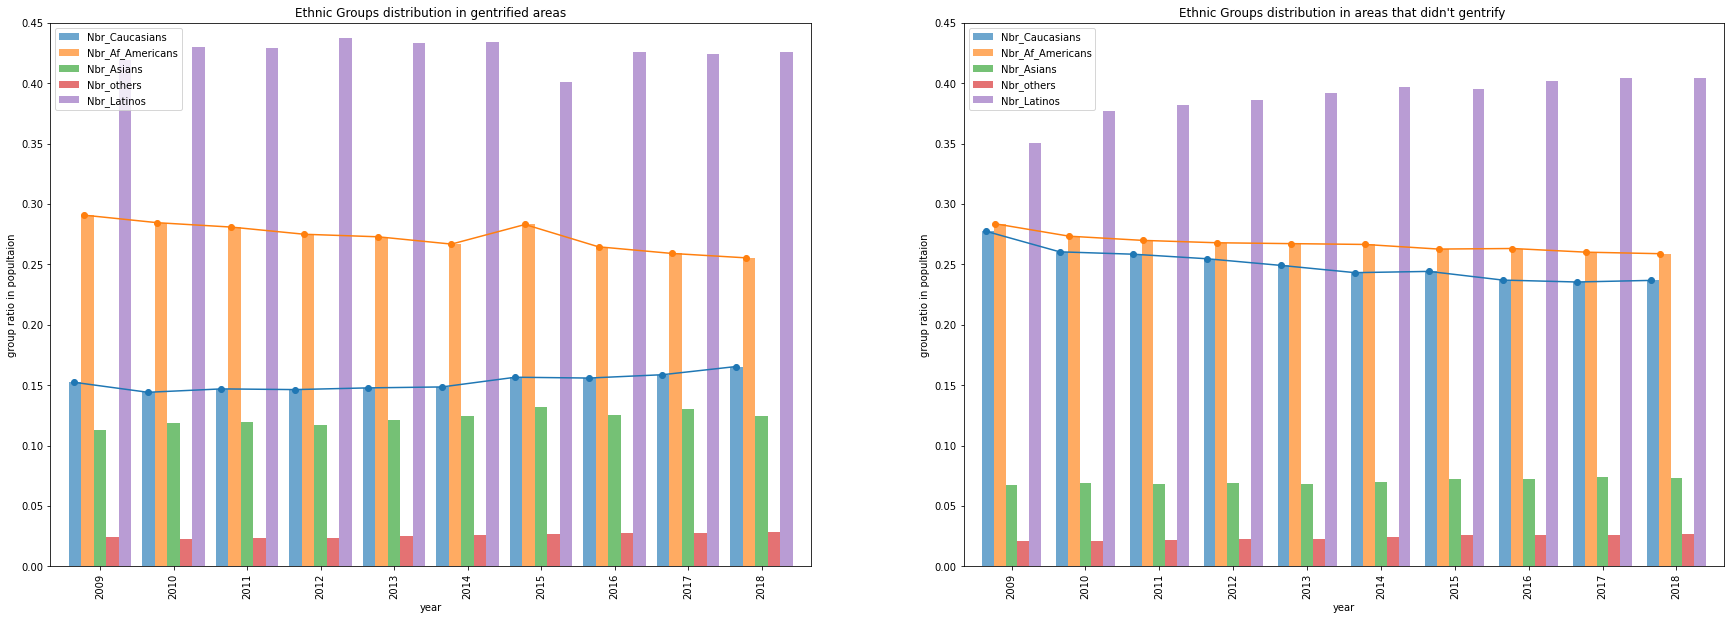

In [12]:
demographic_gentrified=all_data.loc(axis=0)[:,gentrified_tracts].loc[:,'Nbr_Caucasians':'Nbr_Latinos'].groupby('year').sum()
demographic_gentrified['Nbr_others']+=demographic_gentrified['Nbr_Hawaiian_Pac_Islands']+demographic_gentrified['Nbr_Ind_Alaskans']+demographic_gentrified['Nbr_mult_race']
demographic_gentrified.drop(columns=['Nbr_Hawaiian_Pac_Islands','Nbr_Ind_Alaskans','Nbr_mult_race'],inplace=True)
demographic_gentrified=demographic_gentrified.divide(demographic_gentrified.sum(axis=1),axis=0)

demographic_not_gentrified=all_data.loc(axis=0)[:,not_gentrified_tracts].loc[:,'Nbr_Caucasians':'Nbr_Latinos'].groupby('year').sum()
demographic_not_gentrified['Nbr_others']+=demographic_not_gentrified['Nbr_Hawaiian_Pac_Islands']+demographic_not_gentrified['Nbr_Ind_Alaskans']+demographic_not_gentrified['Nbr_mult_race']
demographic_not_gentrified.drop(columns=['Nbr_Hawaiian_Pac_Islands','Nbr_Ind_Alaskans','Nbr_mult_race'],inplace=True)
demographic_not_gentrified=demographic_not_gentrified.divide(demographic_not_gentrified.sum(axis=1),axis=0)

fig,axes=plt.subplots(1,2,figsize=(30,10))
demographic_gentrified.plot(kind='bar',width =0.85,align='center',alpha=0.65,title='Ethnic Groups distribution in gentrified areas',ax=axes[0])
axes[0].plot(axes[0].get_xticks()-0.35,demographic_gentrified['Nbr_Caucasians'],marker='o')
axes[0].plot(axes[0].get_xticks()-0.22,demographic_gentrified['Nbr_Af_Americans'],marker='o')
axes[0].set_ylabel('group ratio in popultaion')
axes[0].set_ylim(top=0.45)
demographic_not_gentrified.plot(kind='bar',width =0.8,align='center',alpha=0.65,title='Ethnic Groups distribution in areas that didn\'t gentrify ',ax=axes[1])
axes[1].plot(axes[0].get_xticks()-0.35,demographic_not_gentrified['Nbr_Caucasians'],marker='o')
axes[1].plot(axes[0].get_xticks()-0.22,demographic_not_gentrified['Nbr_Af_Americans'],marker='o')
axes[1].set_ylabel('group ratio in popultaion')
axes[1].set_ylim(top=0.45)
plt.show()

## Impact of geography : Counties

In [13]:
def sum_gent(x):
  elig=eligible_tracts.intersection(x.index.get_level_values(1))
  return x['gentrified'].groupby('year').sum()/x['gentrified'].loc(axis=0)[:,elig].groupby('year').count()

In [14]:
all_data['county']=all_data['county']*100+all_data['state']

In [15]:
codes=counties.set_index('county_code')
codes.index=counties['county_code']*100+counties['state_code']

Text(0, 0.5, 'Number of Gentrified tracts')

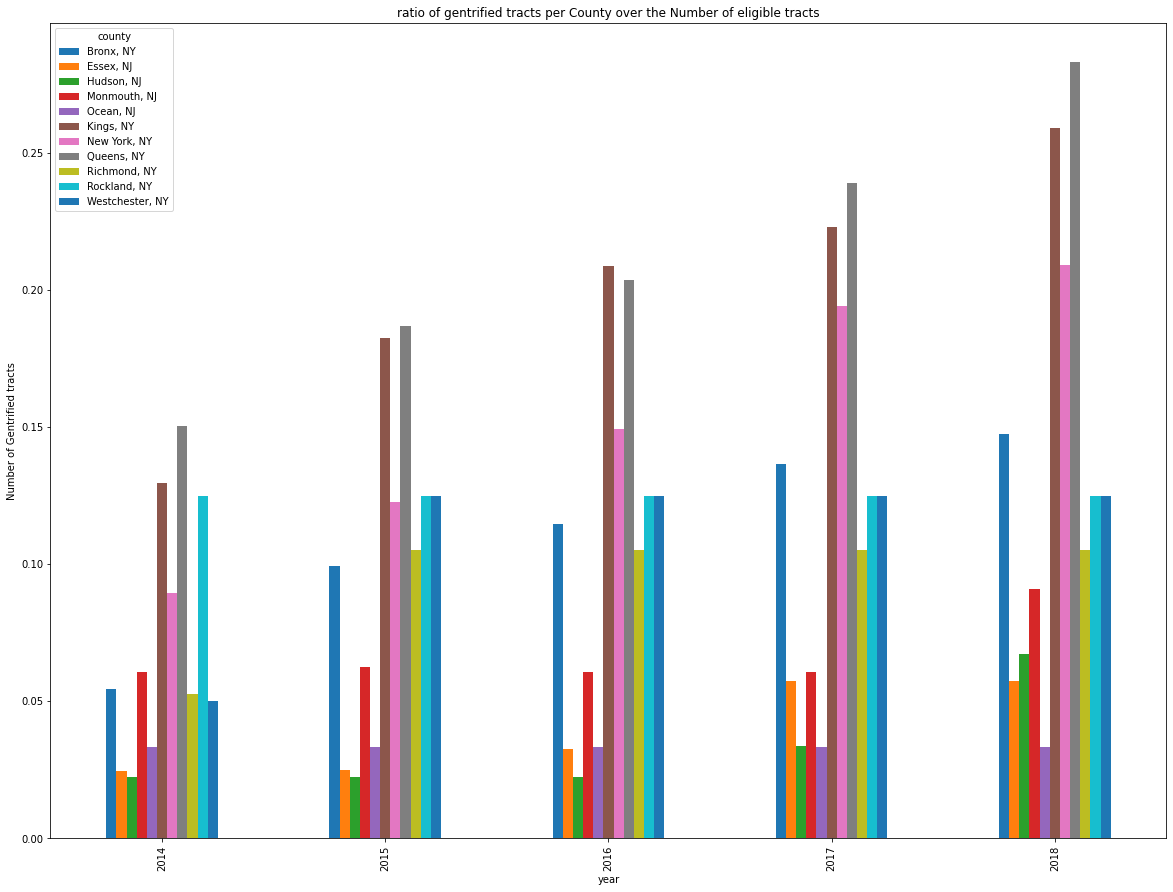

In [16]:
county_dist=all_data.loc(axis=0)[2014:,eligible_train].groupby(['county']).apply(sum_gent)
county_map={code:name for code,name in zip(codes.index,codes['county_name'])}
county_dist=county_dist.rename(mapper=county_map)
fig,ax=plt.subplots(1,1,figsize=(20,15))
county_dist=county_dist.loc[~county_dist.T.eq(0).all()]
county_dist.T.plot(kind='bar',title='ratio of gentrified tracts per County over the Number of eligible tracts',ax=ax)
ax.set_ylabel('Number of Gentrified tracts')

changes in demgraphies along with their levels of  seem to have an impact on gentrification, we'll try to use them as features


## Impact of INcome

In [17]:
from sklearn.linear_model import LinearRegression
from scipy.optimize import nnls
def Income_per_ethnicity(data):
  races = ['Nbr_Caucasians',	'Nbr_Af_Americans',	'Nbr_Ind_Alaskans',	'Nbr_Asians',	'Nbr_Hawaiian_Pac_Islands',	'Nbr_others',	'Nbr_mult_race', 'Nbr_Latinos']
  X = data.loc[:,races].divide(data.loc[:,'Population'],axis=0)
  #We remove one of the groups since sum (frequencies)= 1
  X['Nbr_others']+=X['Nbr_Ind_Alaskans']+X['Nbr_Hawaiian_Pac_Islands']+X['Nbr_mult_race']
  X=X.drop(columns=['Nbr_Ind_Alaskans','Nbr_Hawaiian_Pac_Islands','Nbr_mult_race'])
  #X=X.drop(columns=['Nbr_others'])
  # using nnls (non negative least squares) , without an intercept 
  y = data['mid_Income']
  res,ris=nnls(X, y)
  res=pd.DataFrame(res,index=X.columns,columns=['Income']).sort_values(by='Income')
  return res.drop('Nbr_others')

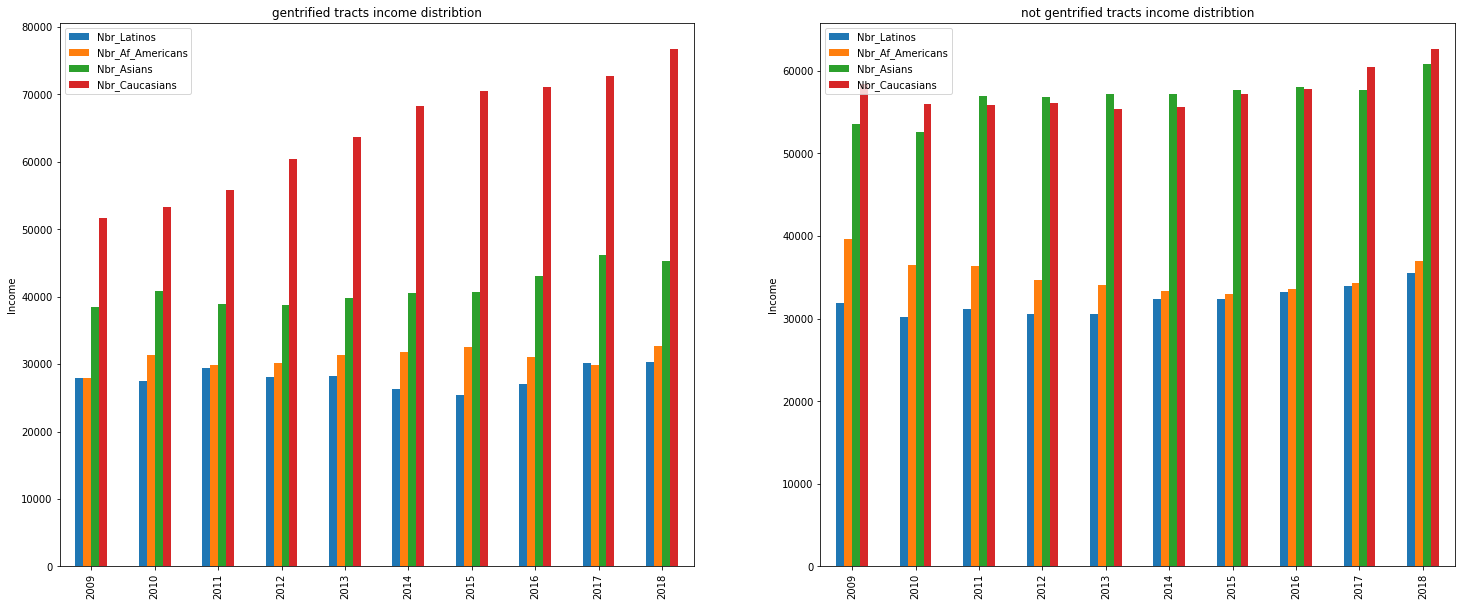

In [18]:
#Method2
labels=['gentrified tracts','not gentrified tracts','eligible tracts']
groups=[gentrified_tracts,not_gentrified_tracts]#,eligible_tracts]
periods=years
n_c=len(periods)
fig,axes=plt.subplots(1,2,figsize=(25,5*2))
axes=axes.ravel()
j=0
for label,group in zip(labels,groups):
  results=[]
  for i,period in enumerate(periods):
    results+=[Income_per_ethnicity(all_data.loc(axis=0)[period,group])]#.T.plot(kind='bar',ax=axes[i],title='year '+str(period)+' '+label)
  results=pd.concat(results,axis=1)
  results.columns=periods
  #Normalizing so can see the effects clearer 
  results.T.plot(kind='bar',ax=axes[j],title= label + ' income distribtion')
  axes[j].set_ylabel('Income')
  j+=1
plt.show()

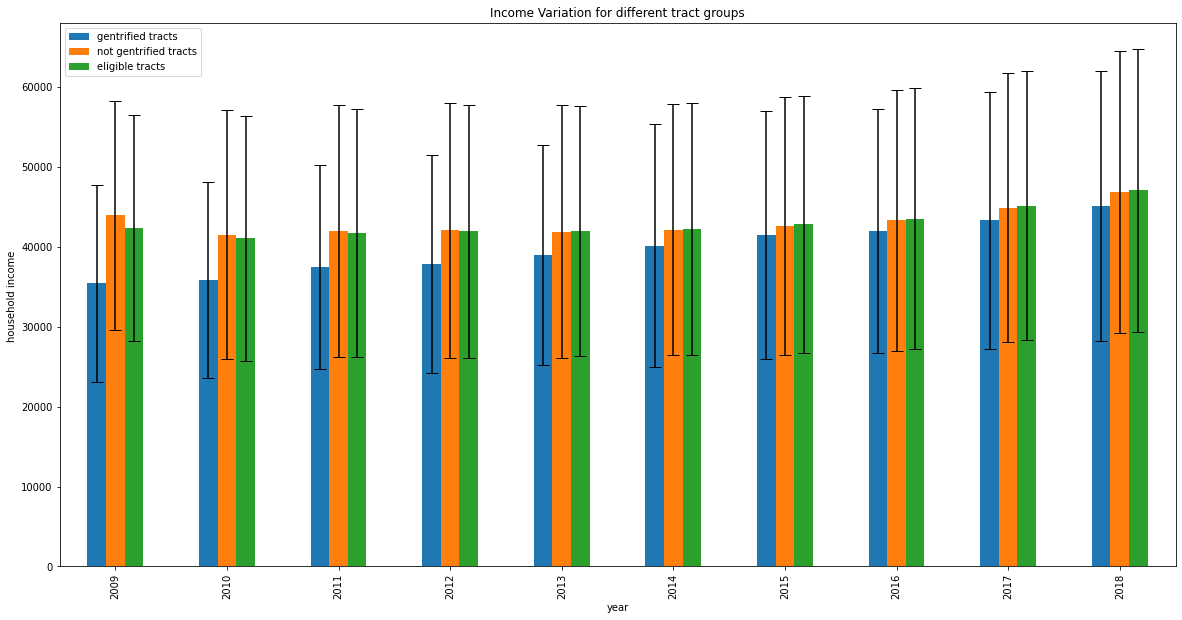

In [19]:
labels=['gentrified tracts','not gentrified tracts','eligible tracts']
groups=[gentrified_tracts,not_gentrified_tracts,eligible_tracts]

incomes=[]
income_std=[]
for group in groups:
  incomes+=[all_data.loc(axis=0)[:,group][['mid_Income']].groupby('year').mean()]
  income_std+=[all_data.loc(axis=0)[:,group][['mid_Income']].groupby('year').std()]
incomes=pd.concat(incomes,axis=1)
incomes.columns=labels

income_std=pd.concat(income_std,axis=1)
income_std.columns=labels
#income_std=incomes+income_std
fig,ax=plt.subplots(1,1,figsize=(20,10))
incomes.plot(kind='bar',ax=ax,title='Income Variation for different tract groups',yerr=income_std,capsize=6)
ax.set_ylabel('household income ')
plt.show()

## Population impact


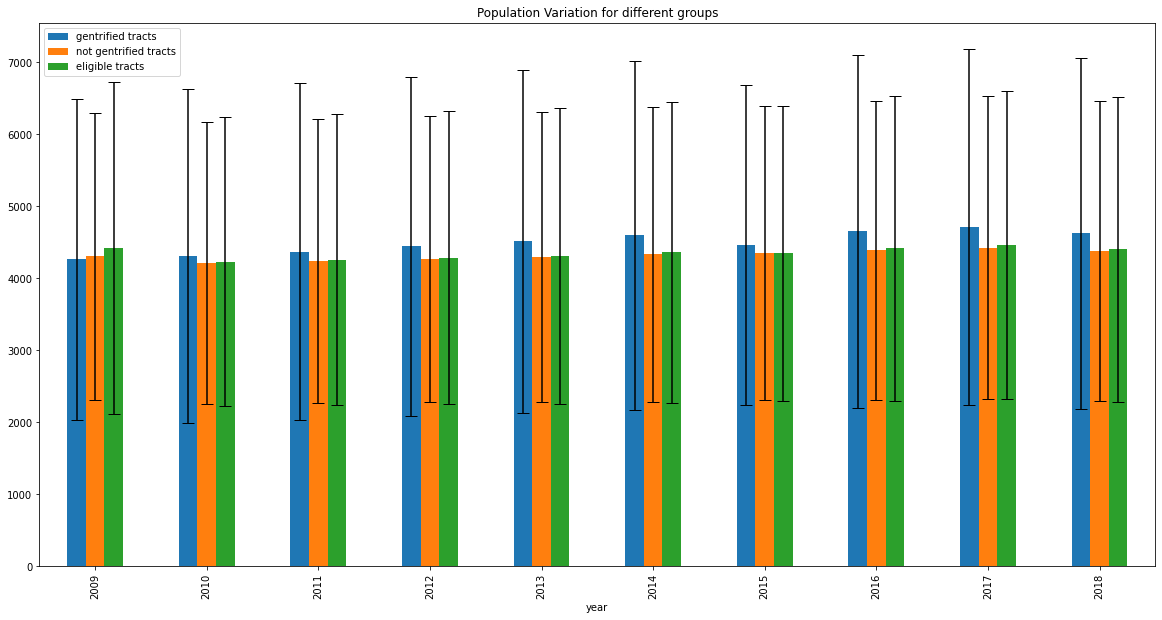

In [20]:
incomes=[]
income_std=[]
for group in groups:
  incomes+=[all_data.loc(axis=0)[:,group][['Population']].groupby('year').mean()]
  income_std+=[all_data.loc(axis=0)[:,group][['Population']].groupby('year').std()]
incomes=pd.concat(incomes,axis=1)
incomes.columns=labels

income_std=pd.concat(income_std,axis=1)
income_std.columns=labels
#income_std=incomes+income_std
fig,ax=plt.subplots(1,1,figsize=(20,10))
incomes.plot(kind='bar',ax=ax,title='Population Variation for different groups',yerr=income_std,capsize=6)
plt.show()

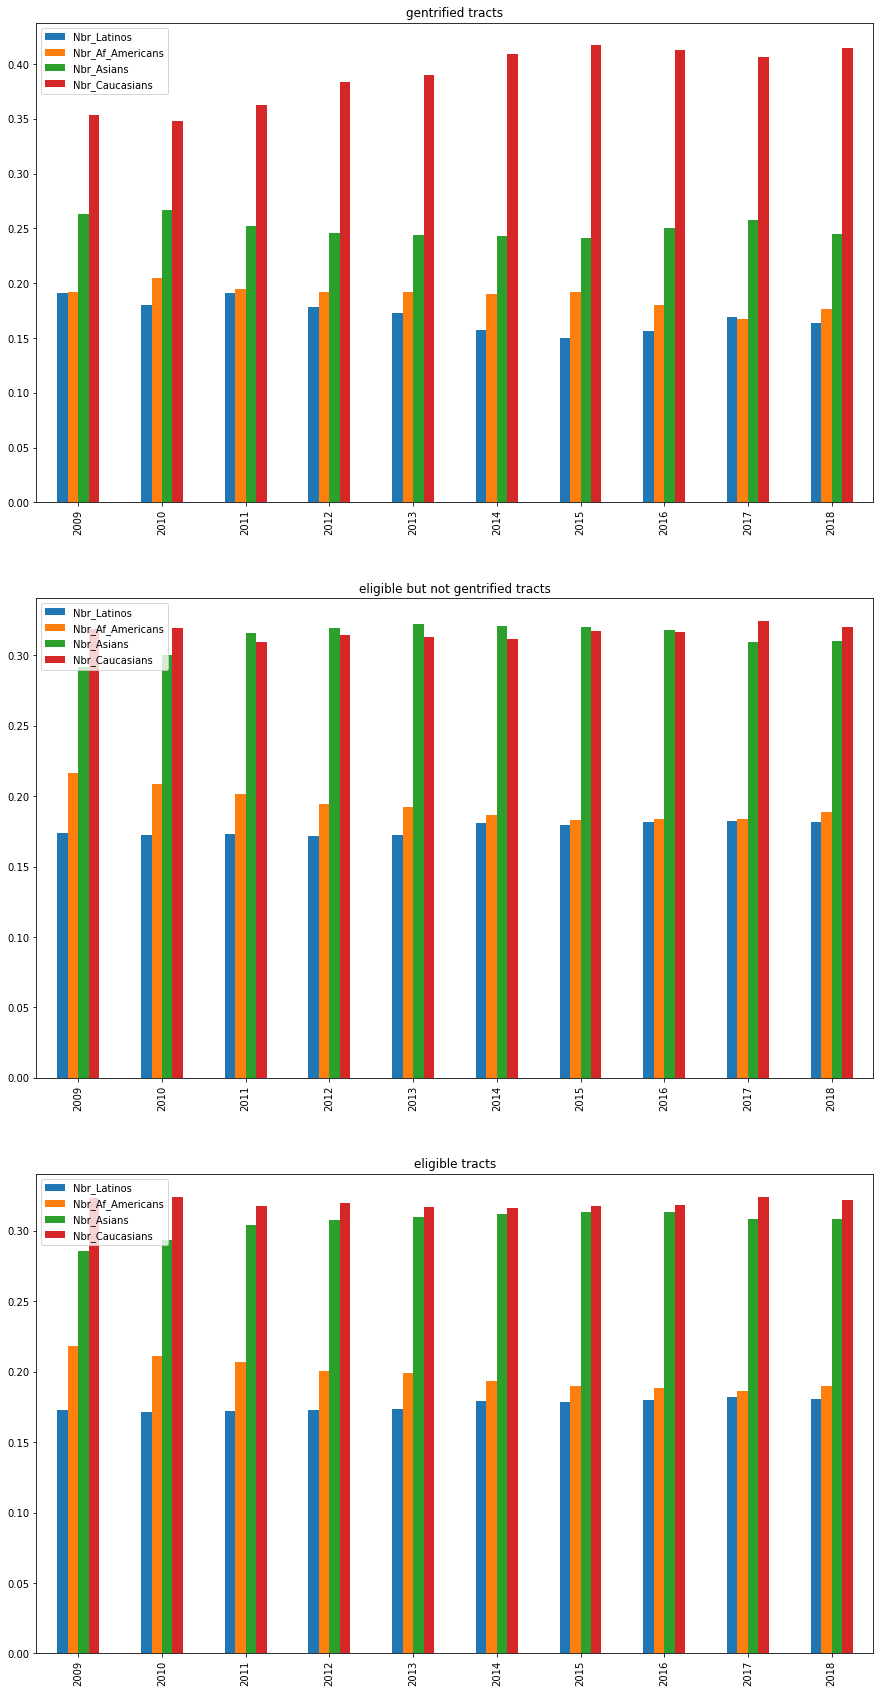

In [21]:
#Method2
labels=['gentrified tracts','eligible but not gentrified tracts','eligible tracts']
groups=[gentrified_tracts,not_gentrified_tracts,eligible_tracts]
periods=years
n_c=len(periods)
fig,axes=plt.subplots(3,1,figsize=(15,10*3))
axes=axes.ravel()
j=0
for label,group in zip(labels,groups):
  results=[]
  for i,period in enumerate(periods):
    results+=[Income_per_ethnicity(all_data.loc(axis=0)[period,group])]#.T.plot(kind='bar',ax=axes[i],title='year '+str(period)+' '+label)
  results=pd.concat(results,axis=1)
  results.columns=periods
  #Normalizing so can see the effects clearer 
  (results/results.sum(0)).T.plot(kind='bar',ax=axes[j],title= label)
  j+=1
plt.show()

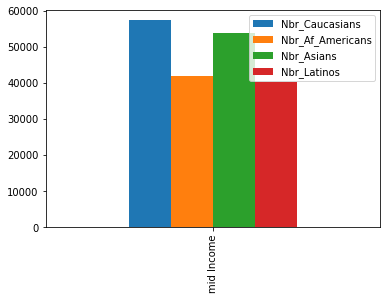

In [22]:
demos=['Nbr_Caucasians','Nbr_Af_Americans','Nbr_Asians','Nbr_Latinos']
data=all_data.loc[2018,demos+['mid_Income']]
data.loc[:,demos]=data.loc[:,demos].divide(all_data.loc[2018,'Population'],axis=0)
quantile=0.7
income=[]

for ethnicity in demos:
  d=data[ethnicity]
  d=data.loc[d>d.quantile(quantile)]
  income+=[d['mid_Income'].mean()]

pd.DataFrame(income,index=demos,columns=['mid Income']).T.plot(kind='bar')      

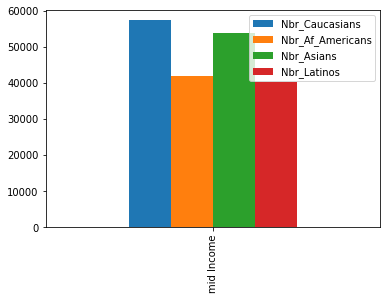

In [23]:
demos=['Nbr_Caucasians','Nbr_Af_Americans','Nbr_Asians','Nbr_Latinos']
data=all_data.loc[2018,demos+['mid_Income']]
data.loc[:,demos]=data.loc[:,demos].divide(all_data.loc[2018,'Population'],axis=0)
data=data.loc[data.index.intersection(eligible_tracts)] 
quantile=0.7
income=[]

for ethnicity in demos:
  d=data[ethnicity]
  d=data.loc[d>d.quantile(quantile)]
  income+=[d['mid_Income'].mean()]

pd.DataFrame(income,index=demos,columns=['mid Income']).T.plot(kind='bar')      

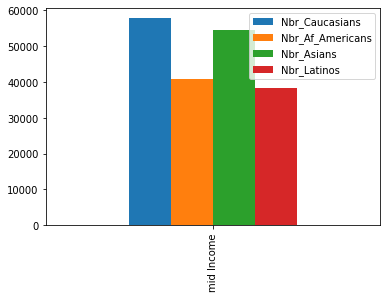

In [24]:
demos=['Nbr_Caucasians','Nbr_Af_Americans','Nbr_Asians','Nbr_Latinos']
data=all_data.loc[2018,demos+['mid_Income']]
data.loc[:,demos]=data.loc[:,demos].divide(all_data.loc[2018,'Population'],axis=0)
data=data.loc[data.index.intersection(gentrified_tracts)] 
quantile=0.7
income=[] 

for ethnicity in demos:
  d=data[ethnicity]
  d=data.loc[d>d.quantile(quantile)]
  income+=[d['mid_Income'].mean()]

pd.DataFrame(income,index=demos,columns=['mid Income']).T.plot(kind='bar')      

## Features

In [25]:
from sklearn.linear_model import LinearRegression

def col_reg(x):
  reg=LinearRegression().fit(np.array(x.index.get_level_values(0)).reshape(-1,1),x.values)
  return reg.coef_[0]

def trend_demo(x):
  return x.apply(col_reg,axis=0)*100

def pick_first(x):
  return x.iloc[0]
  

In [26]:
demographies_train=all_data.loc(axis=0)[:2014,eligible_train].loc[:,'Nbr_Caucasians':'Nbr_Latinos'].divide(all_data.loc(axis=0)[:2014,eligible_train].loc[:,'Population'],axis=0)
demographies_train['Nbr_others']+=demographies_train['Nbr_Hawaiian_Pac_Islands']+demographies_train['Nbr_Ind_Alaskans']+demographies_train['Nbr_mult_race']
demographies_train.drop(columns=['Nbr_Hawaiian_Pac_Islands','Nbr_Ind_Alaskans','Nbr_mult_race'],inplace=True)


#adding Income 


incomes=all_data.loc[:,'Income White':'Income Latino']
incomes.drop(columns=['Income Hawaiian_Pac_Islands','Income other','Income Ind_Alaskans','Income mult_race'],inplace=True)
incomes=incomes.loc(axis=0)[:2014,eligible_train]


demographies_train=pd.concat((demographies_train,all_data.loc(axis=0)[:2014,eligible_train].loc[:,['mid_Income']],incomes),axis=1)

#Trends 
trends=demographies_train.groupby('geoid').apply(trend_demo)
trends.columns+=' Trend'

#all features
demographies_feature=demographies_train.groupby('geoid').apply(pick_first)

In [27]:
from scipy.stats import entropy
races = ['Nbr_Caucasians',	'Nbr_Af_Americans',	'Nbr_Ind_Alaskans',	'Nbr_Asians',	'Nbr_Hawaiian_Pac_Islands',	'Nbr_others',	'Nbr_mult_race', 'Nbr_Latinos']
race_entropy = pd.DataFrame(entropy(all_data.loc(axis=0)[:2014,eligible_train][races], axis=1),index=demographies_train.index,columns=['race entropy'])
race_entropy=race_entropy.loc[2014]-race_entropy.loc[2009]

In [28]:
"""

def trend_demo(x):
  short_ma=x.rolling(2,min_periods=2).mean()*100
  long_ma=x.rolling(5,min_periods=4).mean()*100
  trend=(short_ma-long_ma)/
  return trend.iloc[-1]
"""


'\n\ndef trend_demo(x):\n  short_ma=x.rolling(2,min_periods=2).mean()*100\n  long_ma=x.rolling(5,min_periods=4).mean()*100\n  trend=(short_ma-long_ma)/\n  return trend.iloc[-1]\n'

In [29]:
from sklearn.preprocessing import OneHotEncoder
#One hot encoding 
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
county_data=all_data.loc(axis=0)[:2014,eligible_train].loc[:,['county']]
one_hot=enc.fit_transform(county_data)
county_one_hot=pd.DataFrame(one_hot,index=county_data.index).groupby('geoid').apply(pick_first)

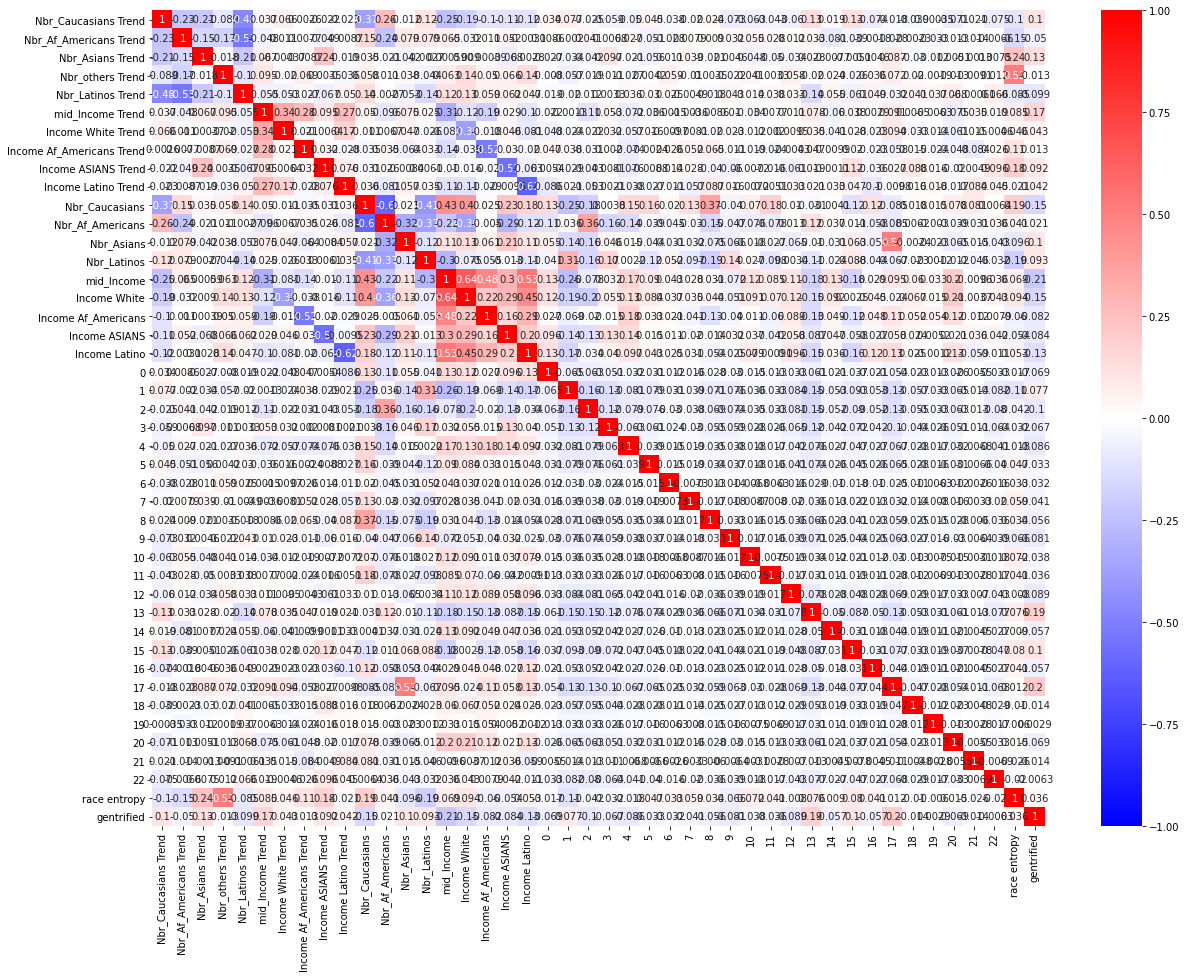

In [30]:
X=pd.concat((trends,demographies_feature,county_one_hot,race_entropy,train_data[['gentrified']]),axis=1).dropna()
X=X.drop(columns=['Nbr_others']) #sum frequencies =  so we drop one of them 
fig,ax=plt.subplots(1,1,figsize=(20,15))
sns.heatmap(X.corr(),cmap='bwr',annot=True,ax=ax,vmax=1,vmin=-1)

## Logistic regression


In [31]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X.iloc[:,:-1], X.iloc[:,-1], test_size=0.1, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)


gentrified_tracts=test_data.loc[test_data['gentrified']==1].index
eligible_test=eligible_tracts.intersection(test_data.index)
not_gentrified_tracts=test_data.loc[test_data['gentrified']!=1].index.intersection(eligible_test)


demographies_test=all_data.loc(axis=0)[:2014,eligible_test].loc[:,'Nbr_Caucasians':'Nbr_Latinos'].divide(all_data.loc(axis=0)[:2014,eligible_test].loc[:,'Population'],axis=0)
demographies_test['Nbr_others']+=demographies_test['Nbr_Hawaiian_Pac_Islands']+demographies_test['Nbr_Ind_Alaskans']+demographies_test['Nbr_mult_race']
demographies_test.drop(columns=['Nbr_Hawaiian_Pac_Islands','Nbr_Ind_Alaskans','Nbr_mult_race'],inplace=True)


incomes=all_data.loc[:,'Income White':'Income Latino']
incomes.drop(columns=['Income Hawaiian_Pac_Islands','Income other','Income Ind_Alaskans','Income mult_race'],inplace=True)
incomes=incomes.loc(axis=0)[:2014,eligible_test]



#adding Income 
demographies_test=pd.concat((demographies_test,all_data.loc(axis=0)[:2014,eligible_test].loc[:,['mid_Income']],incomes),axis=1)

#Trends 
trends=demographies_test.groupby('geoid').apply(trend_demo)
trends.columns+=' Trend'

#all features
demographies_feature=demographies_test.groupby('geoid').apply(pick_first)


county_data_test=all_data.loc(axis=0)[:2014,eligible_test].loc[:,['county']]
one_hot_test=enc.transform(county_data_test)
county_one_hot_test=pd.DataFrame(one_hot_test,index=county_data_test.index).groupby('geoid').apply(pick_first)

race_entropy_test = pd.DataFrame(entropy(all_data.loc(axis=0)[:2014,eligible_test][races], axis=1),index=demographies_test.index,columns=['race entropy'])
race_entropy_test=race_entropy_test.loc[2014]-race_entropy_test.loc[2009]

X_test=pd.concat((trends,demographies_feature,county_one_hot_test,race_entropy_test,test_data[['gentrified']]),axis=1).dropna()
X_test=X_test.drop(columns=['Nbr_others']) #sum frequencies =  so we drop one of them

X_test,y_test=X_test.iloc[:,:-1], X_test.iloc[:,-1]
X_test=scaler.transform(X_test)

In [588]:
#PCA 
"""from sklearn.decomposition import PCA
pca=PCA(random_state=42,n_components=X_train.shape[1]-2).fit(X_train)
X_train_pca=pca.transform(X_train)
clf = LogisticRegression(random_state=42,C=0.4,class_weight='balanced').fit(X_train_pca,y_train)
print(classification_report(y_train,clf.predict(X_train_pca)))"""

"from sklearn.decomposition import PCA\npca=PCA(random_state=42,n_components=X_train.shape[1]-2).fit(X_train)\nX_train_pca=pca.transform(X_train)\nclf = LogisticRegression(random_state=42,C=0.4,class_weight='balanced').fit(X_train_pca,y_train)\nprint(classification_report(y_train,clf.predict(X_train_pca)))"

In [32]:
Cs=np.linspace(0.01,10,1000)
clf = LogisticRegressionCV(random_state=42,Cs=Cs,class_weight='balanced',max_iter=1000).fit(X_train,y_train)
clf.C_

array([0.04])

In [33]:
clf = LogisticRegression(random_state=13,C=0.04,class_weight='balanced',max_iter=1000).fit(X_train,y_train)
print(classification_report(y_train,clf.predict(X_train)))
print(classification_report(y_val,clf.predict(X_val)))
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82       665
           1       0.35      0.84      0.49       118

    accuracy                           0.74       783
   macro avg       0.65      0.78      0.66       783
weighted avg       0.87      0.74      0.77       783

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        71
           1       0.35      0.75      0.48        16

    accuracy                           0.70        87
   macro avg       0.64      0.72      0.64        87
weighted avg       0.82      0.70      0.73        87

              precision    recall  f1-score   support

           0       0.96      0.68      0.80       189
           1       0.32      0.85      0.46        33

    accuracy                           0.71       222
   macro avg       0.64      0.77      0.63       222
weighted avg       0.87      0.71      0.75       222



In [34]:
codes=counties.set_index('county_code')
codes.index=counties['county_code']*100+counties['state_code']

feats=[]
for name in enc.get_feature_names():
  feats+=[int(name.split('_')[1])]
ind_names={i:codes.loc[feat,'county_name']+ ' county' for i,feat in enumerate(feats)}

In [35]:
importance=pd.DataFrame(clf.coef_.ravel(),index=X.columns[:-1],columns=['feature importance']).sort_values('feature importance',ascending=False)
a=importance.reset_index()[['index']]
importance.index=a.replace(ind_names)['index']

Text(0.5, 0, '')

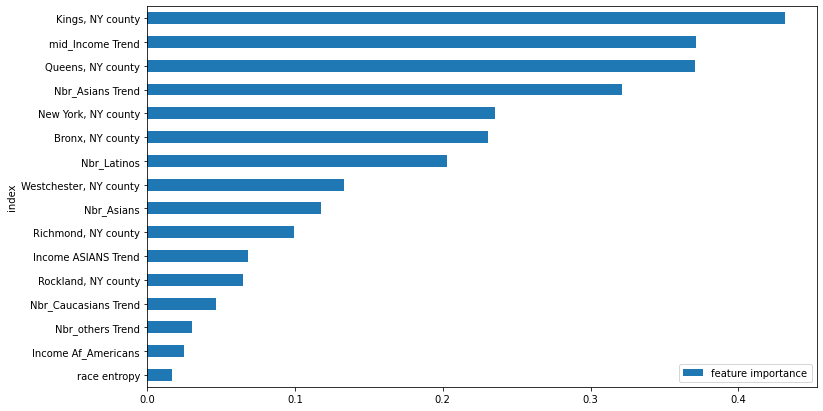

In [36]:
fig,axes=plt.subplots(1,1,figsize=(12,7))
importance[:16].sort_values('feature importance').plot(kind='barh',ax=axes)
axes.set_xlabel('feat importance')
axes.set_xlabel('')

## xgBoost


In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

X_train, X_val, y_train, y_val = train_test_split(X.iloc[:,:-1], X.iloc[:,-1], test_size=0.1, random_state=42)
counts=y_train.value_counts()


In [38]:


gentrified_tracts=test_data.loc[test_data['gentrified']==1].index
eligible_test=eligible_tracts.intersection(test_data.index)
not_gentrified_tracts=test_data.loc[test_data['gentrified']!=1].index.intersection(eligible_test)


demographies_test=all_data.loc(axis=0)[:2014,eligible_test].loc[:,'Nbr_Caucasians':'Nbr_Latinos'].divide(all_data.loc(axis=0)[:2014,eligible_test].loc[:,'Population'],axis=0)
demographies_test['Nbr_others']+=demographies_test['Nbr_Hawaiian_Pac_Islands']+demographies_test['Nbr_Ind_Alaskans']+demographies_test['Nbr_mult_race']
demographies_test.drop(columns=['Nbr_Hawaiian_Pac_Islands','Nbr_Ind_Alaskans','Nbr_mult_race'],inplace=True)


incomes=all_data.loc[:,'Income White':'Income Latino']
incomes.drop(columns=['Income Hawaiian_Pac_Islands','Income other','Income Ind_Alaskans','Income mult_race'],inplace=True)
incomes=incomes.loc(axis=0)[:2014,eligible_test]



#adding Income 
demographies_test=pd.concat((demographies_test,all_data.loc(axis=0)[:2014,eligible_test].loc[:,['mid_Income']],incomes),axis=1)

#Trends 
trends=demographies_test.groupby('geoid').apply(trend_demo)
trends.columns+=' Trend'

#all features
demographies_feature=demographies_test.groupby('geoid').apply(pick_first)


county_data_test=all_data.loc(axis=0)[:2014,eligible_test].loc[:,['county']]
one_hot_test=enc.transform(county_data_test)
county_one_hot_test=pd.DataFrame(one_hot_test,index=county_data_test.index).groupby('geoid').apply(pick_first)

race_entropy_test = pd.DataFrame(entropy(all_data.loc(axis=0)[:2014,eligible_test][races], axis=1),index=demographies_test.index,columns=['race entropy'])
race_entropy_test=race_entropy_test.loc[2014]-race_entropy_test.loc[2009]

X_test=pd.concat((trends,demographies_feature,county_one_hot_test,race_entropy_test,test_data[['gentrified']]),axis=1).dropna()
X_test=X_test.drop(columns=['Nbr_others']) #sum frequencies =  so we drop one of them

X_test,y_test=X_test.iloc[:,:-1], X_test.iloc[:,-1]


## xgboost hyperparams tuning 

In [39]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'scale_pos_weight':counts[0]/counts[1]
}
num_boost_round = 999


In [40]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)


gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(1,5)
    for min_child_weight in range(1,5)]



# Define initial best params and MAE
min_loss = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'logloss'},
        early_stopping_rounds=50)
    # Update best MAE
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tlogloss {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_loss:
        min_loss = mean_logloss
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, mlogloss: {}".format(best_params[0], best_params[1], min_loss))

CV with max_depth=1, min_child_weight=1
	logloss 0.5173548 for 164 rounds
CV with max_depth=1, min_child_weight=2
	logloss 0.5184932 for 153 rounds
CV with max_depth=1, min_child_weight=3
	logloss 0.5159958 for 139 rounds
CV with max_depth=1, min_child_weight=4
	logloss 0.5117456 for 261 rounds
CV with max_depth=2, min_child_weight=1
	logloss 0.46515960000000006 for 72 rounds
CV with max_depth=2, min_child_weight=2
	logloss 0.4573116 for 95 rounds
CV with max_depth=2, min_child_weight=3
	logloss 0.4663804 for 64 rounds
CV with max_depth=2, min_child_weight=4
	logloss 0.4594664 for 104 rounds
CV with max_depth=3, min_child_weight=1
	logloss 0.4329884 for 38 rounds
CV with max_depth=3, min_child_weight=2
	logloss 0.45354479999999997 for 39 rounds
CV with max_depth=3, min_child_weight=3
	logloss 0.44103960000000003 for 35 rounds
CV with max_depth=3, min_child_weight=4
	logloss 0.4395348 for 54 rounds
CV with max_depth=4, min_child_weight=1
	logloss 0.4341082 for 23 rounds
CV with max_dept

In [41]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]

In [42]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]
min_loss = float("Inf")
best_params = None
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'logloss'},
        early_stopping_rounds=20)
    # Update best logloss
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tlogloss {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_loss:
        min_loss = mean_logloss
        best_params = (subsample,colsample)
print("Best params: {}, {}, mlogloss: {}".format(best_params[0], best_params[1], min_loss))

CV with subsample=1.0, colsample=1.0
	logloss 0.42351799999999995 for 33 rounds
CV with subsample=1.0, colsample=0.9
	logloss 0.429943 for 38 rounds
CV with subsample=1.0, colsample=0.8
	logloss 0.4390186 for 37 rounds
CV with subsample=1.0, colsample=0.7
	logloss 0.4246742 for 27 rounds
CV with subsample=0.9, colsample=1.0
	logloss 0.4341194 for 36 rounds
CV with subsample=0.9, colsample=0.9
	logloss 0.4239192 for 34 rounds
CV with subsample=0.9, colsample=0.8
	logloss 0.45124819999999993 for 32 rounds
CV with subsample=0.9, colsample=0.7
	logloss 0.42687880000000006 for 27 rounds
CV with subsample=0.8, colsample=1.0
	logloss 0.45436440000000006 for 26 rounds
CV with subsample=0.8, colsample=0.9
	logloss 0.4475252 for 23 rounds
CV with subsample=0.8, colsample=0.8
	logloss 0.4490708 for 25 rounds
CV with subsample=0.8, colsample=0.7
	logloss 0.44484880000000004 for 30 rounds
CV with subsample=0.7, colsample=1.0
	logloss 0.452874 for 19 rounds
CV with subsample=0.7, colsample=0.9
	logl

In [43]:
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]

In [44]:
min_loss = float("Inf")
best_params = None
for eta in [0.35,0.32,0.31,.3,.29,.28, .27,]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'logloss'},
        early_stopping_rounds=20)
    # Update best logloss
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tlogloss {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_loss:
        min_loss = mean_logloss
        best_params = eta
print("Best params: {}, mlogloss: {}".format(best_params, min_loss))

CV with eta=0.35
	logloss 0.44967379999999996 for 31 rounds
CV with eta=0.32
	logloss 0.4219018 for 23 rounds
CV with eta=0.31
	logloss 0.4544378 for 27 rounds
CV with eta=0.3
	logloss 0.42351799999999995 for 33 rounds
CV with eta=0.29
	logloss 0.43773439999999997 for 30 rounds
CV with eta=0.28
	logloss 0.42712479999999997 for 36 rounds
CV with eta=0.27
	logloss 0.43061620000000006 for 33 rounds
Best params: 0.32, mlogloss: 0.4219018


In [45]:
params['eta'] = best_params

In [46]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest=xgb.DMatrix(X_test, label=y_test)

clf = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dval, "Val")],
    early_stopping_rounds=10
)


[0]	Val-logloss:0.625408
Will train until Val-logloss hasn't improved in 10 rounds.
[1]	Val-logloss:0.566737
[2]	Val-logloss:0.550085
[3]	Val-logloss:0.55158
[4]	Val-logloss:0.552372
[5]	Val-logloss:0.549781
[6]	Val-logloss:0.522781
[7]	Val-logloss:0.536323
[8]	Val-logloss:0.53064
[9]	Val-logloss:0.511084
[10]	Val-logloss:0.503277
[11]	Val-logloss:0.497917
[12]	Val-logloss:0.503305
[13]	Val-logloss:0.506137
[14]	Val-logloss:0.507735
[15]	Val-logloss:0.504211
[16]	Val-logloss:0.499171
[17]	Val-logloss:0.4813
[18]	Val-logloss:0.480746
[19]	Val-logloss:0.480589
[20]	Val-logloss:0.487075
[21]	Val-logloss:0.489341
[22]	Val-logloss:0.496554
[23]	Val-logloss:0.489293
[24]	Val-logloss:0.475903
[25]	Val-logloss:0.48987
[26]	Val-logloss:0.488186
[27]	Val-logloss:0.491737
[28]	Val-logloss:0.495985
[29]	Val-logloss:0.4921
[30]	Val-logloss:0.490721
[31]	Val-logloss:0.492103
[32]	Val-logloss:0.493477
[33]	Val-logloss:0.487724
[34]	Val-logloss:0.485046
Stopping. Best iteration:
[24]	Val-logloss:0.475

In [47]:
print(classification_report(y_train,(clf.predict(dtrain)>0.5)*1))
print(classification_report(y_val,(clf.predict(dval)>0.5)*1))
print(classification_report(y_test,(clf.predict(dtest)>0.5)*1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       665
           1       0.96      1.00      0.98       118

    accuracy                           0.99       783
   macro avg       0.98      1.00      0.99       783
weighted avg       0.99      0.99      0.99       783

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        71
           1       0.23      0.19      0.21        16

    accuracy                           0.74        87
   macro avg       0.53      0.52      0.52        87
weighted avg       0.72      0.74      0.72        87

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       189
           1       0.37      0.42      0.39        33

    accuracy                           0.81       222
   macro avg       0.63      0.65      0.64       222
weighted avg       0.82      0.81      0.81       222



# EMS data

In [48]:
ems=pd.read_csv('/content/drive/My Drive/CitadelDatathon2020/data/ems_dataframe.csv',index_col=[1,0])
ems=ems.sort_index()
eligible_tracts_emc=eligible_tracts.intersection(ems.index.get_level_values(1).unique())
ems=ems.loc(axis=0)[years,eligible_tracts_emc]
ems=ems.rename_axis(index=['year', 'geoid'])
ems=ems.loc[:,['SHOT', 'DRUG', 'STAB', 'PD13', 'RAPE', 'CHILDA', 'MCI43P']]

In [49]:
a=ems.loc(axis=0)[:,:].groupby('year').mean()
a=a.loc[~a.T.eq(0).all()]
a.loc[:,a.mean().ge(0.03)]

SHOT        DRUG       STAB      PD13      RAPE    CHILDA    MCI43P
year                                                                         
2009  6.082192   67.774734   8.593607  2.187215  1.794521  0.627093  0.257230
2010  5.572298   74.754947   8.228311  1.592085  1.716895  0.627093  0.278539
2011  6.304414   78.735160   7.576865  1.073059  1.566210  0.680365  0.267884
2012  6.021309   80.514460   7.123288  1.039574  1.520548  0.652968  0.270928
2014  4.934551   91.519026   7.424658  0.450533  1.283105  0.377473  0.325723
2015  4.824962  107.223744  10.257230  3.914764  1.251142  0.313546  0.280061
2016  4.114155  114.998478   9.913242  3.847793  1.012177  0.369863  0.304414
2017  3.942161  115.147641   8.949772  3.652968  0.608828  0.273973  0.339422
2018  3.167428  123.601218   8.476408  3.666667  0.000000  0.217656  0.000000

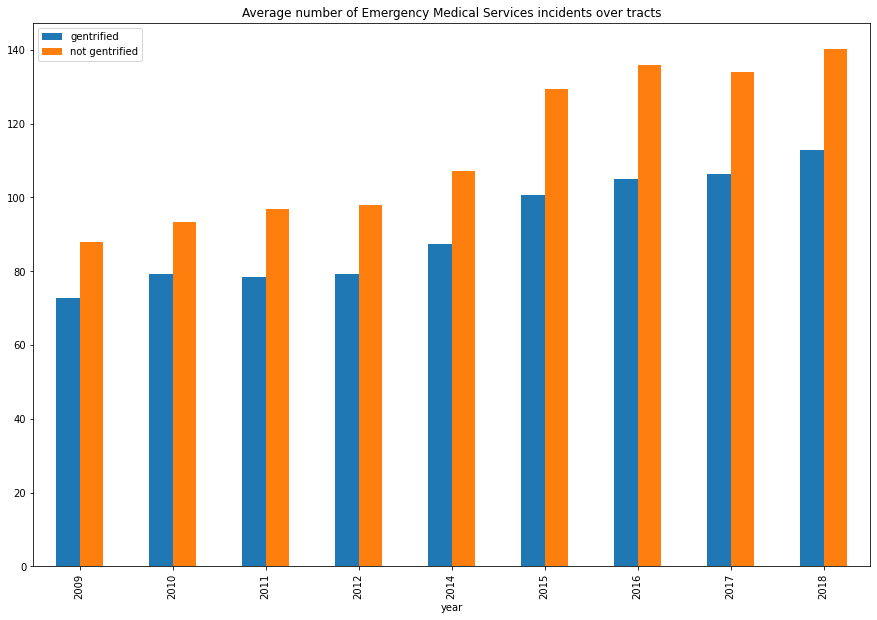

In [51]:
e1=ems.loc(axis=0)[:,gentrified_tracts].groupby('year').mean().sum(1)
e2=ems.loc(axis=0)[:,eligible_tracts_emc.difference(gentrified_tracts)].groupby('year').mean().sum(1)
e=pd.concat((e1,e2),axis=1)
e.columns=['gentrified','not gentrified']
e=e.loc[~e.T.eq(0).all()]
# l'essentiel             
e.plot(kind='bar',figsize=(15,10),title='Average number of Emergency Medical Services incidents over tracts')

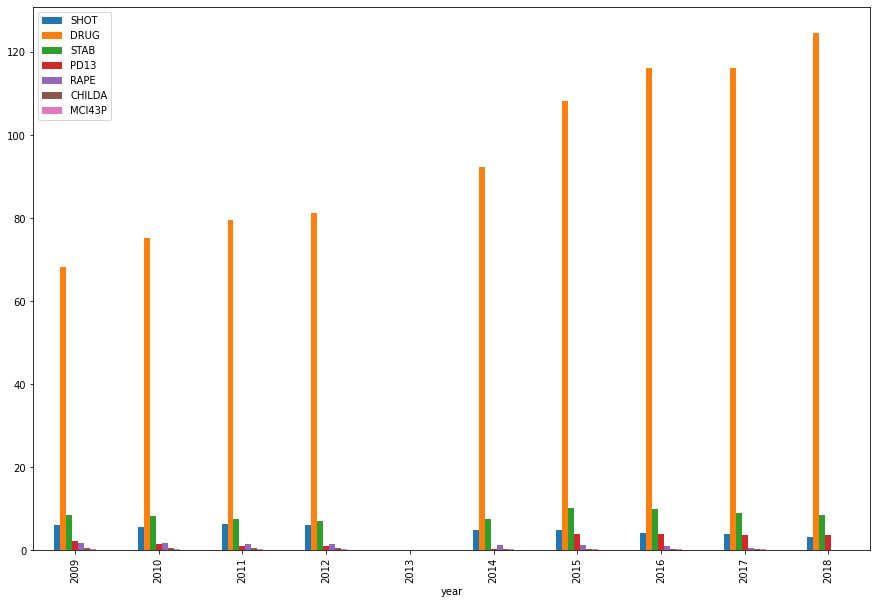

In [52]:
ems.loc(axis=0)[:,eligible_tracts_emc.difference(gentrified_tracts)].groupby('year').mean().plot(kind='bar',figsize=(15,10))

#  Tract Geography (Geopanda)


In [53]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
!pip install contextily
import contextily as ctx
from shapely.geometry import Polygon
import matplotlib.patches as mpatches


/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


     |████████████████████████████████| 18.3MB 27.8MB/s 


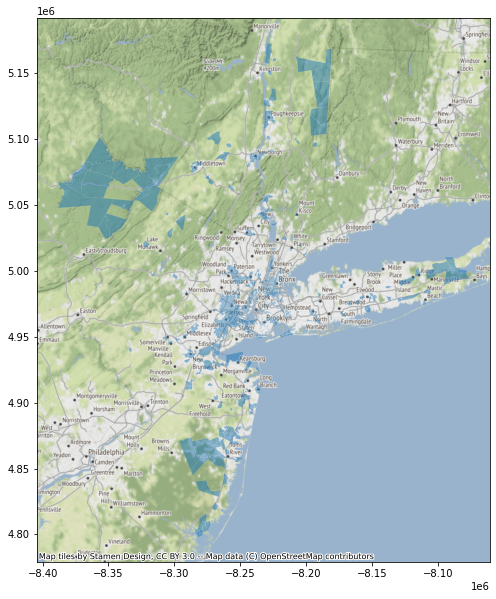

In [54]:
#NYC 2010 data
tracts_nyc = gpd.read_file("/content/drive/My Drive/CitadelDatathon2020/data/nyc_2016")
tracts_nj=gpd.read_file("/content/drive/My Drive/CitadelDatathon2020/data/nj_2016")
tract_pa=gpd.read_file("/content/drive/My Drive/CitadelDatathon2020/data/pa_2016")
tracts=pd.concat((tracts_nyc,tracts_nj,tract_pa)).reset_index(drop=True)

tracts['GEOID']=tracts['GEOID'].astype(int)
tracts=tracts.set_index(['GEOID'])

tracts=tracts.loc[all_data.loc[2018].index.intersection(tracts.index)]
tracts=tracts.to_crs(epsg=3857)
ax = tracts.plot(figsize=(10, 10), alpha=0.5, edgecolor='w',linewidth=0.1)
ctx.add_basemap(ax)

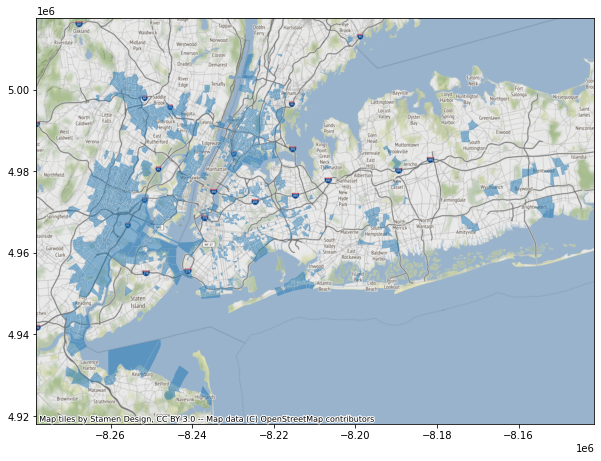

In [55]:
Y=tracts['INTPTLAT'].astype(float)
X=tracts['INTPTLON'].astype(float)
ax = tracts.loc[(X<-73.2)&(X>-74.3)&(Y>40.4)&(Y<41)].plot(figsize=(10, 10), alpha=0.5, edgecolor='w',linewidth=0.1)
ctx.add_basemap(ax)

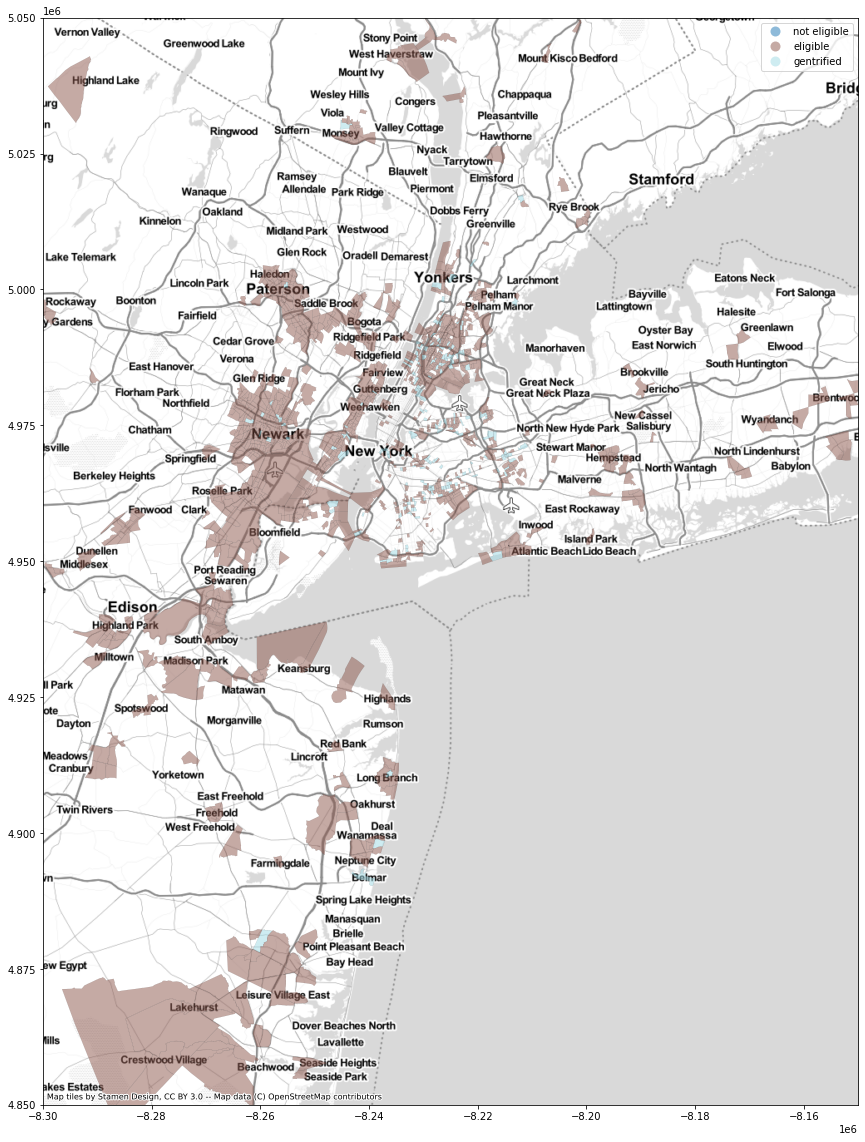

In [56]:
merged_tracts=tracts.merge(all_data.loc[2018],left_index=True,right_index=True)
merged_tracts['criteria']='not eligible'
merged_tracts.loc[eligible_tracts.intersection(merged_tracts.index),'criteria']='eligible'
merged_tracts.loc[merged_tracts['gentrified']==1,'criteria']='gentrified'
merged_tracts=merged_tracts.to_crs(epsg=3857)
fig,ax=plt.subplots(1,1,figsize=(30, 20))
xlim=(-8.3*1e6,-8.15*1e6)
ylim=(4.85*1e6,5.05*1e6)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
merged_tracts.plot(column='criteria',ax=ax, alpha=0.5,legend=True,categories=['not eligible','eligible','gentrified'],cmap='tab20',linewidth=0.1,edgecolor='black')
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

In [57]:

lat_point_list =[5.05*1e6,5.05*1e6,4.9*1e6,4.9*1e6]#] 
lon_point_list = [-8.15*1e6,-8.3*1e6,-8.3*1e6,-8.15*1e6]#]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
crs = {'init': 'epsg:3857'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])     

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


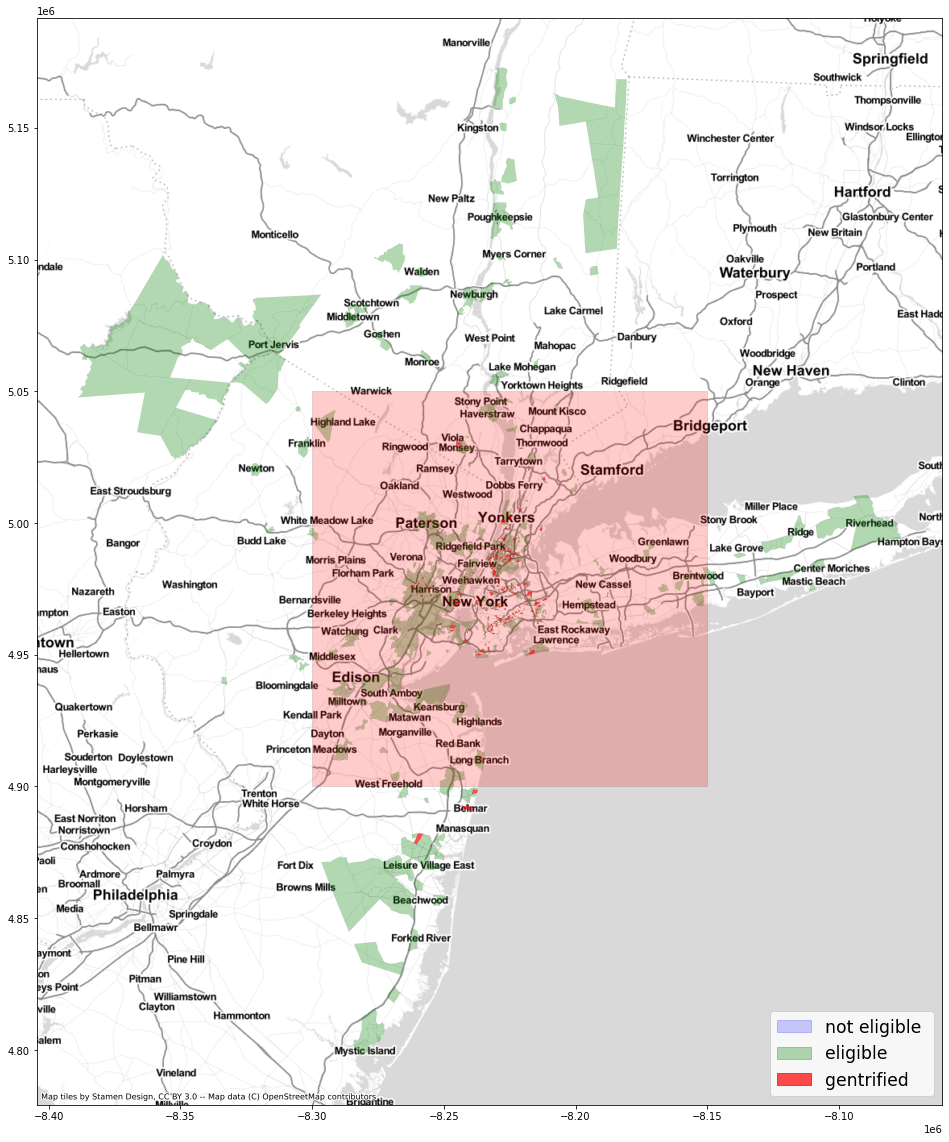

In [58]:

merged_tracts=tracts.merge(all_data.loc[2018],left_index=True,right_index=True)
merged_tracts['criteria']=0#'not eligible'
merged_tracts.loc[eligible_tracts.intersection(merged_tracts.index),'criteria']=1#'eligible'
merged_tracts.loc[merged_tracts['gentrified']==1,'criteria']=2#'gentrified'
merged_tracts=merged_tracts.to_crs(epsg=3857)


not_elig_legend = mpatches.Patch(color='b', label='not eligible ',alpha=0.2)
eligible_legend= mpatches.Patch(color='g', label='eligible',alpha=0.3)
gent_legend = mpatches.Patch(color='r', label='gentrified',alpha=0.7)

fig,ax=plt.subplots(1,1,figsize=(30, 20))
xlim=(-8.3*1e6,-8.15*1e6)
ylim=(4.9*1e6,5.05*1e6)
#ax.set_xlim(xlim)
#ax.set_ylim(ylim)
merged_tracts.loc[merged_tracts['criteria']==0].plot(ax=ax, alpha=0.2,linewidth=0.1,edgecolor='black',color='b',label='eligible')
merged_tracts.loc[merged_tracts['criteria']==1].plot(ax=ax, alpha=0.3,linewidth=0.1,edgecolor='black',color='g',label=' eligible')
merged_tracts.loc[merged_tracts['criteria']==2].plot(ax=ax, alpha=0.7,linewidth=0.1,edgecolor='black',color='r',label=' gentrified')
ax.legend(handles=[not_elig_legend,eligible_legend,gent_legend],fontsize='xx-large',loc='lower right')
polygon.plot(ax=ax, alpha=0.2,legend=True,linewidth=0.5,edgecolor='black',color='r')
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)


/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


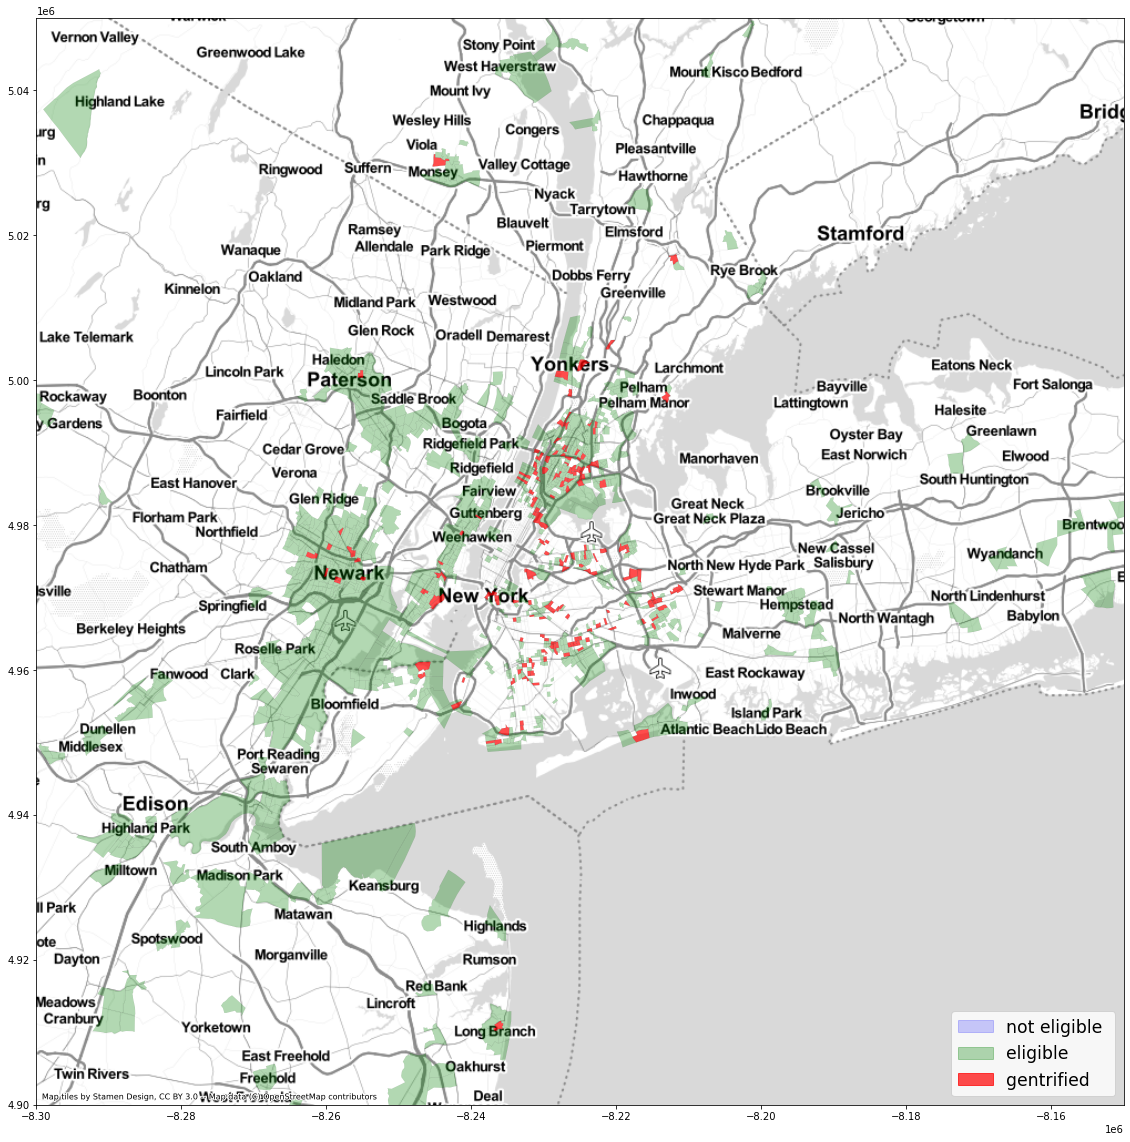

In [59]:
fig,ax=plt.subplots(1,1,figsize=(30, 20))
xlim=(-8.3*1e6,-8.15*1e6)
ylim=(4.9*1e6,5.05*1e6)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
merged_tracts.loc[merged_tracts['criteria']==0].plot(ax=ax, alpha=0.2,linewidth=0.1,edgecolor='black',color='b',label='eligible')
merged_tracts.loc[merged_tracts['criteria']==1].plot(ax=ax, alpha=0.3,linewidth=0.1,edgecolor='black',color='g',label=' eligible')
merged_tracts.loc[merged_tracts['criteria']==2].plot(ax=ax, alpha=0.7,linewidth=0.1,edgecolor='black',color='r',label=' gentrified')
ax.legend(handles=[not_elig_legend,eligible_legend,gent_legend],fontsize='xx-large',loc='lower right')
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite) 

In [60]:
not_elig_legend = mpatches.Patch(color='b', label='not eligible ',alpha=0.2)
eligible_legend= mpatches.Patch(color='g', label='eligible',alpha=0.3)
gent_legend = mpatches.Patch(color='r', label='gentrified',alpha=0.7)
legend_311=mpatches.Patch(color='orange', label='311 calls',alpha=0.5)

fig,axes=plt.subplots(3,3,figsize=(15*3, 20*3))
plt.subplots_adjust(wspace = 0.02,hspace = 0.02)
axes=axes.ravel()
for i,year in enumerate(years[1:]):
  ax=axes[i]

  """call_311=pd.read_csv(call_311_path[i])
  df = call_311.dropna(subset=["Latitude", "Longitude"])
  geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
  geo_requests = gpd.GeoDataFrame(df, crs=4326, geometry=geometry)
  geo_requests=geo_requests.to_crs(epsg=3857)"""


  merged_tracts=tracts.merge(all_data.loc[year],left_index=True,right_index=True)
  merged_tracts['criteria']=0#'not eligible'
  merged_tracts.loc[eligible_tracts.intersection(merged_tracts.index),'criteria']=1#'eligible'
  merged_tracts.loc[merged_tracts['gentrified']==1,'criteria']=2#'gentrified'
  merged_tracts=merged_tracts.to_crs(epsg=3857)

  xlim=(-8.3*1e6,-8.15*1e6)
  ylim=(4.85*1e6,5.05*1e6)
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  merged_tracts.loc[merged_tracts['criteria']==0].plot(ax=ax, alpha=0.2,linewidth=0.1,edgecolor='black',color='b',label='eligible')
  #geo_requests.plot(ax=ax, marker='o', color='orange', markersize=0.01,alpha=0.1)
  merged_tracts.loc[merged_tracts['criteria']==1].plot(ax=ax, alpha=0.6,linewidth=0.1,edgecolor='black',color='g',label=' eligible')
  merged_tracts.loc[merged_tracts['criteria']==2].plot(ax=ax, alpha=0.7,linewidth=0.1,edgecolor='black',color='r',label=' gentrified')

  ax.legend(handles=[not_elig_legend,eligible_legend,gent_legend,legend_311],fontsize='xx-large',loc='lower right')

  ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)
  
  ax.set_title('Year: '+str(year))
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [61]:
relabel_df = pd.read_csv('/content/drive/My Drive/CitadelDatathon2020/data/complaint_categorization.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Plumbing


/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


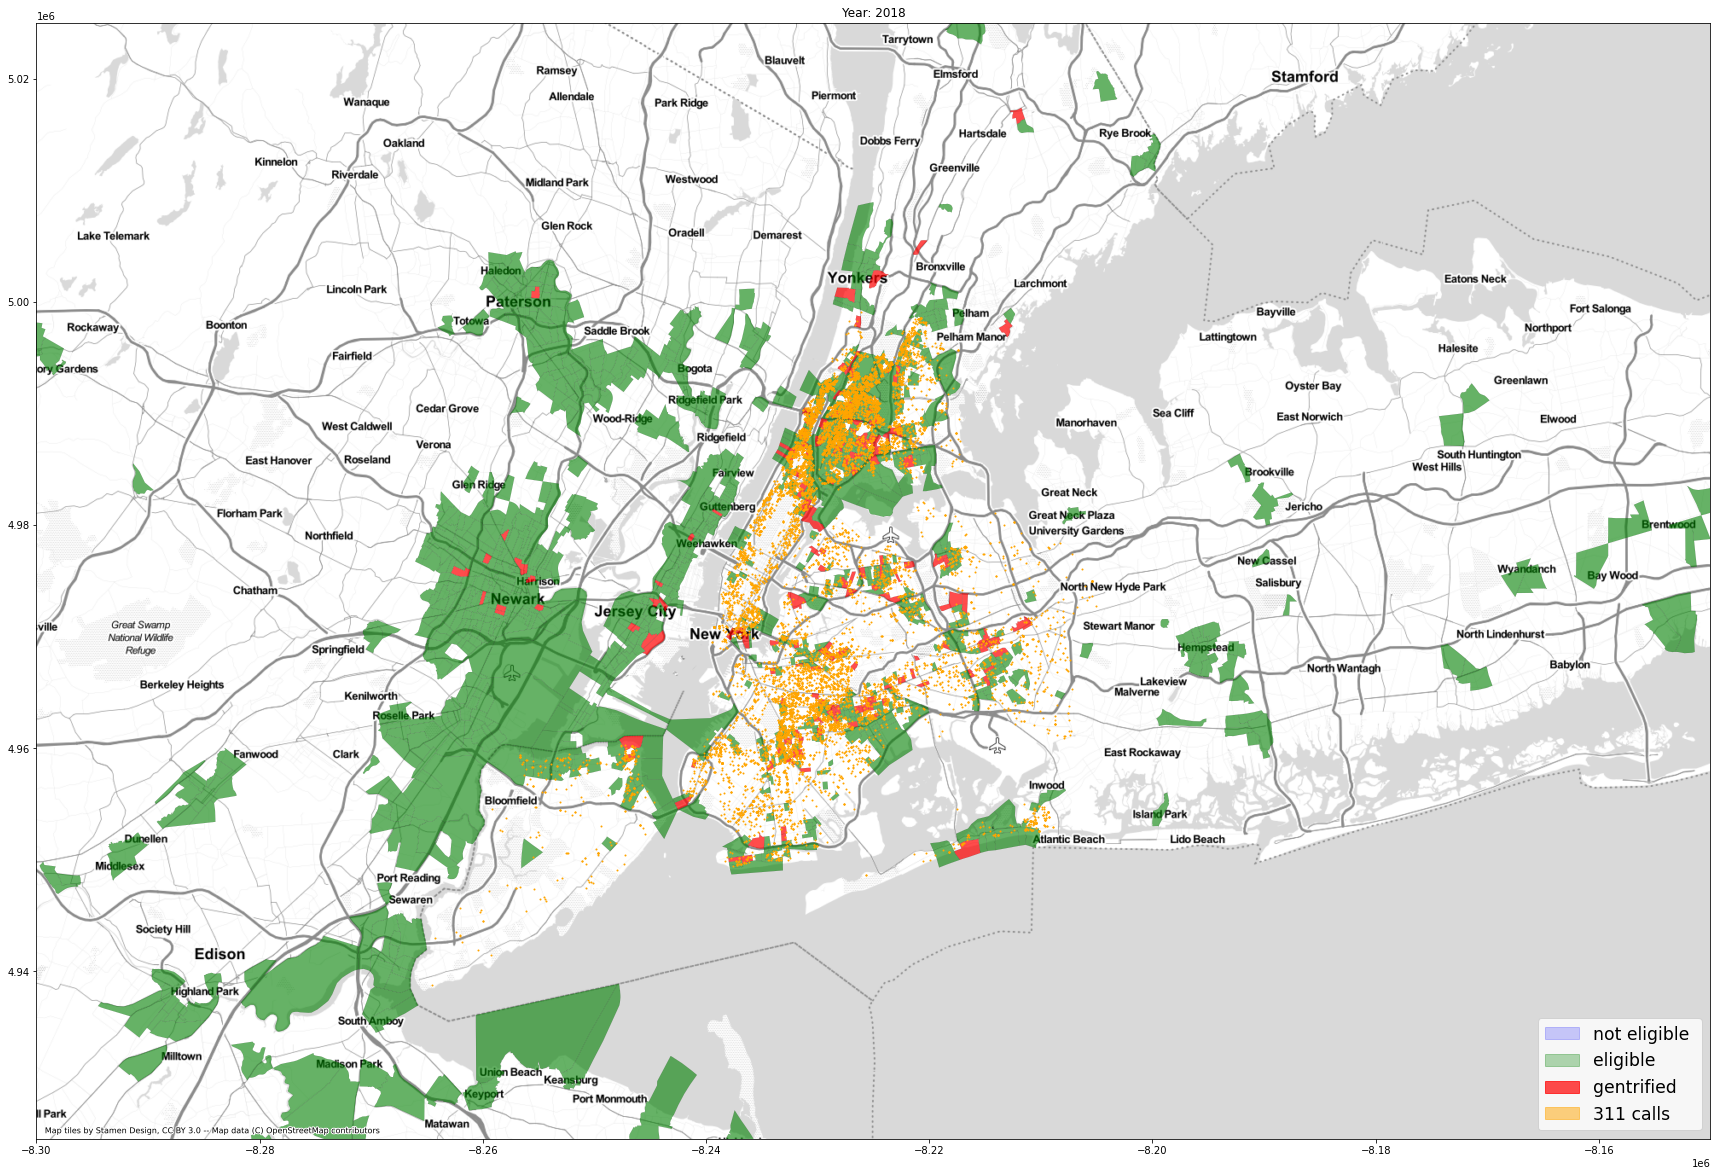

In [62]:
not_elig_legend = mpatches.Patch(color='b', label='not eligible ',alpha=0.2)
eligible_legend= mpatches.Patch(color='g', label='eligible',alpha=0.3)
gent_legend = mpatches.Patch(color='r', label='gentrified',alpha=0.7)
legend_311=mpatches.Patch(color='orange', label='311 calls',alpha=0.5)

fig,axes=plt.subplots(1,1,figsize=(30, 40))
plt.subplots_adjust(wspace = 0.02,hspace = 0.02)
#axes=axes.ravel()
for i,year in enumerate(years[-1:]):
  ax=axes#[i]

  df = pd.read_csv(call_311_path[-1])
  df = df.merge(relabel_df, on='Complaint Type',how='left')
  df = df.dropna(subset=["Latitude", "Longitude"])
  geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
  geo_requests = gpd.GeoDataFrame(df, crs=4326, geometry=geometry)
  geo_requests=geo_requests.to_crs(epsg=3857)

  category,request=list(geo_requests.groupby('Complaint Category'))[13]
  print(category)


  merged_tracts=tracts.merge(all_data.loc[year],left_index=True,right_index=True)
  merged_tracts['criteria']=0#'not eligible'
  merged_tracts.loc[eligible_tracts.intersection(merged_tracts.index),'criteria']=1#'eligible'
  merged_tracts.loc[merged_tracts['gentrified']==1,'criteria']=2#'gentrified'
  merged_tracts=merged_tracts.to_crs(epsg=3857)

  xlim=(-8.3*1e6,-8.15*1e6)
  ylim=(4.925*1e6,5.025*1e6)
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  merged_tracts.loc[merged_tracts['criteria']==0].plot(ax=ax, alpha=0.2,linewidth=0.1,edgecolor='black',color='b',label='eligible')
  merged_tracts.loc[merged_tracts['criteria']==1].plot(ax=ax, alpha=0.6,linewidth=0.1,edgecolor='black',color='g',label=' eligible')
  merged_tracts.loc[merged_tracts['criteria']==2].plot(ax=ax, alpha=0.7,linewidth=0.1,edgecolor='black',color='r',label=' gentrified')
  request.plot(ax=ax, marker='o', color='orange', markersize=1,alpha=1)

  ax.legend(handles=[not_elig_legend,eligible_legend,gent_legend,legend_311],fontsize='xx-large',loc='lower right')

  ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)
  
  ax.set_title('Year: '+str(year))
plt.show()